# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1




print('Generating Data')
print('--------------------')
base_url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Generating Data
--------------------
Processing Record 1 of Set 1 : atuona
Processing Record 2 of Set 1 : rikitea
City not found. Skipping...
Processing Record 3 of Set 1 : union
Processing Record 4 of Set 1 : barvinkove
Processing Record 5 of Set 1 : hithadhoo
Processing Record 6 of Set 1 : mogadishu
Processing Record 7 of Set 1 : port macquarie
Processing Record 8 of Set 1 : bandarbeyla
Processing Record 9 of Set 1 : dawlatabad
Processing Record 10 of Set 1 : hilo
Processing Record 11 of Set 1 : hobart
Processing Record 12 of Set 1 : port alfred
Processing Record 13 of Set 1 : saskylakh
Processing Record 14 of Set 1 : ust-kuyga
Processing Record 15 of Set 1 : qaanaaq
Processing Record 16 of Set 1 : klaksvik
Processing Record 17 of Set 1 : severo-kurilsk
Processing Record 18 of Set 1 : faanui
Processing Record 19 of Set 1 : hofn
Processing Record 20 of Set 1 : vaini
Processing Record 21 of Set 1 : albany
Processing Record 22 of Set 1 : avarua
Processing Record 23 of Set 1 : itarsi
Pro

Processing Record 36 of Set 4 : tual
City not found. Skipping...
Processing Record 37 of Set 4 : baruun-urt
Processing Record 38 of Set 4 : ancud
Processing Record 39 of Set 4 : maniitsoq
Processing Record 40 of Set 4 : tagusao
Processing Record 41 of Set 4 : cherskiy
Processing Record 42 of Set 4 : birnin kebbi
Processing Record 43 of Set 4 : itarema
Processing Record 44 of Set 4 : srednekolymsk
City not found. Skipping...
Processing Record 45 of Set 4 : indianola
City not found. Skipping...
Processing Record 46 of Set 4 : horsham
Processing Record 47 of Set 4 : egvekinot
Processing Record 48 of Set 4 : yulara
Processing Record 49 of Set 4 : vostok
Processing Record 50 of Set 4 : yingcheng
Processing Record 0 of Set 5 : buraydah
Processing Record 1 of Set 5 : sao joao da barra
Processing Record 2 of Set 5 : ponta delgada
City not found. Skipping...
Processing Record 3 of Set 5 : kyra
Processing Record 4 of Set 5 : bairiki
Processing Record 5 of Set 5 : sabha
Processing Record 6 of Set

Processing Record 19 of Set 8 : buin
Processing Record 20 of Set 8 : lebu
Processing Record 21 of Set 8 : harper
Processing Record 22 of Set 8 : luanda
Processing Record 23 of Set 8 : nanortalik
Processing Record 24 of Set 8 : manyana
Processing Record 25 of Set 8 : mizdah
Processing Record 26 of Set 8 : sisimiut
Processing Record 27 of Set 8 : galle
Processing Record 28 of Set 8 : price
Processing Record 29 of Set 8 : aykhal
Processing Record 30 of Set 8 : muana
Processing Record 31 of Set 8 : narrabri
Processing Record 32 of Set 8 : nuevo progreso
Processing Record 33 of Set 8 : bengkulu
Processing Record 34 of Set 8 : ballina
City not found. Skipping...
Processing Record 35 of Set 8 : mamallapuram
City not found. Skipping...
Processing Record 36 of Set 8 : ambanja
Processing Record 37 of Set 8 : alice
Processing Record 38 of Set 8 : bonavista
Processing Record 39 of Set 8 : sur
Processing Record 40 of Set 8 : san rafael
Processing Record 41 of Set 8 : lazaro cardenas
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# data frame for analysis
weather_data = pd.DataFrame({"City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})

weather_data.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [7]:
# data check
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,20,PF,1619267168,77,-9.8000,-139.0333,79.63,17.78
1,Rikitea,100,PF,1619267085,78,-23.1203,-134.9692,76.41,10.98
2,Union,1,US,1619267106,40,40.6334,-74.2663,55.99,3.44
3,Barvinkove,39,UA,1619267182,45,48.9097,37.0205,51.66,18.54
4,Hithadhoo,80,MV,1619267179,67,-0.6000,73.0833,83.79,5.17
...,...,...,...,...,...,...,...,...,...
525,Sarab,55,IR,1619267336,17,38.6066,44.9883,79.27,7.09
526,San Cristobal,40,VE,1619267237,89,7.7669,-72.2250,78.80,2.30
527,Winslow,1,US,1619267337,40,35.0242,-110.6974,50.00,14.97
528,Azul,54,AR,1619267337,98,-36.7770,-59.8585,57.00,5.99


In [15]:
# convert to csv file for analysis
weather_data.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
#  Get the indices of cities that have humidity over 100%.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

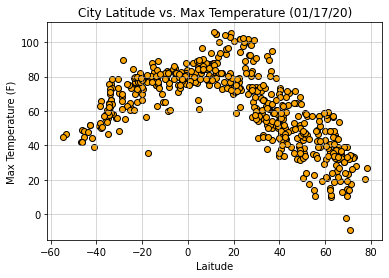

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "orange", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

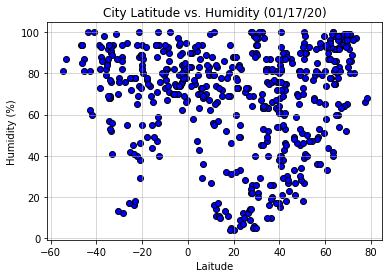

In [13]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression